**SUPPORT VECTOR MACHINE**

**Task 1: Exploratory Data Analysis (EDA)**

1.	Load the Mushroom dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.



In [1]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv('mushroom.csv')

In [3]:
print('dataframe:',df)
print('df.info():',df.info())
print('df.shape',df.shape)

dataframe:       Unnamed: 0 cap_shape cap_surface  ...      class stalk_height cap_diameter
0           1167    sunken       scaly  ...  poisonous    14.276173     5.054983
1           1037    sunken     fibrous  ...     edible     3.952715    19.068319
2            309      flat     grooves  ...  poisonous     9.054265     7.205884
3            282      bell       scaly  ...  poisonous     5.226499    20.932692
4            820      flat      smooth  ...  poisonous    14.037532    12.545245
...          ...       ...         ...  ...        ...          ...          ...
1995         863    sunken       scaly  ...  poisonous     5.877891    17.464145
1996        1160    sunken       scaly  ...  poisonous     6.500840    13.501957
1997         265    convex     grooves  ...  poisonous    13.558064    11.270020
1998         411      bell      smooth  ...  poisonous    11.092703     8.423199
1999        1073    convex       scaly  ...  poisonous    13.066414    21.056642

[2000 rows x 26 

In [4]:
df.duplicated().sum()

np.int64(1024)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

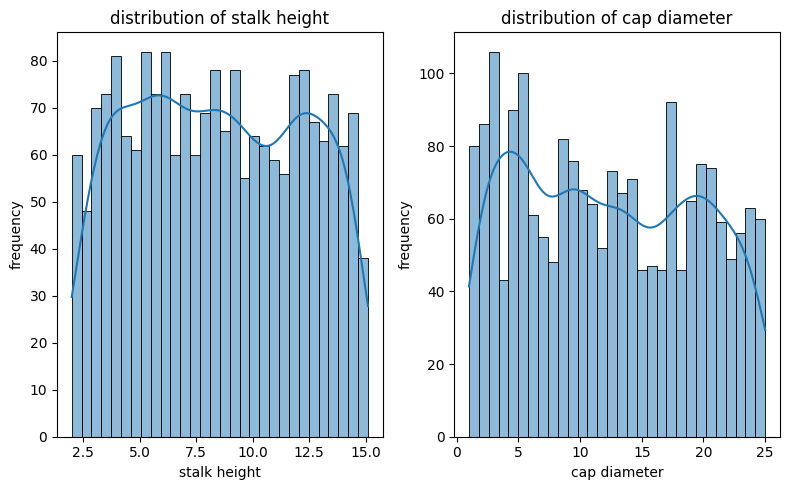

In [6]:


plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(df['stalk_height'],kde=True,bins=30)
plt.title(f'distribution of stalk height')
plt.xlabel('stalk height')
plt.ylabel('frequency')



plt.subplot(1,2,2)
sns.histplot(df['cap_diameter'],kde=True,bins=30)
plt.title(f'distribution of cap diameter')
plt.xlabel('cap diameter')
plt.ylabel('frequency')


plt.tight_layout()
plt.show()



/tmp/ipython-input-1154465209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette='viridis')
/tmp/ipython-input-1154465209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette='viridis')
/tmp/ipython-input-1154465209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette='viridis')
/tmp/ipython-input-1154465209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effe

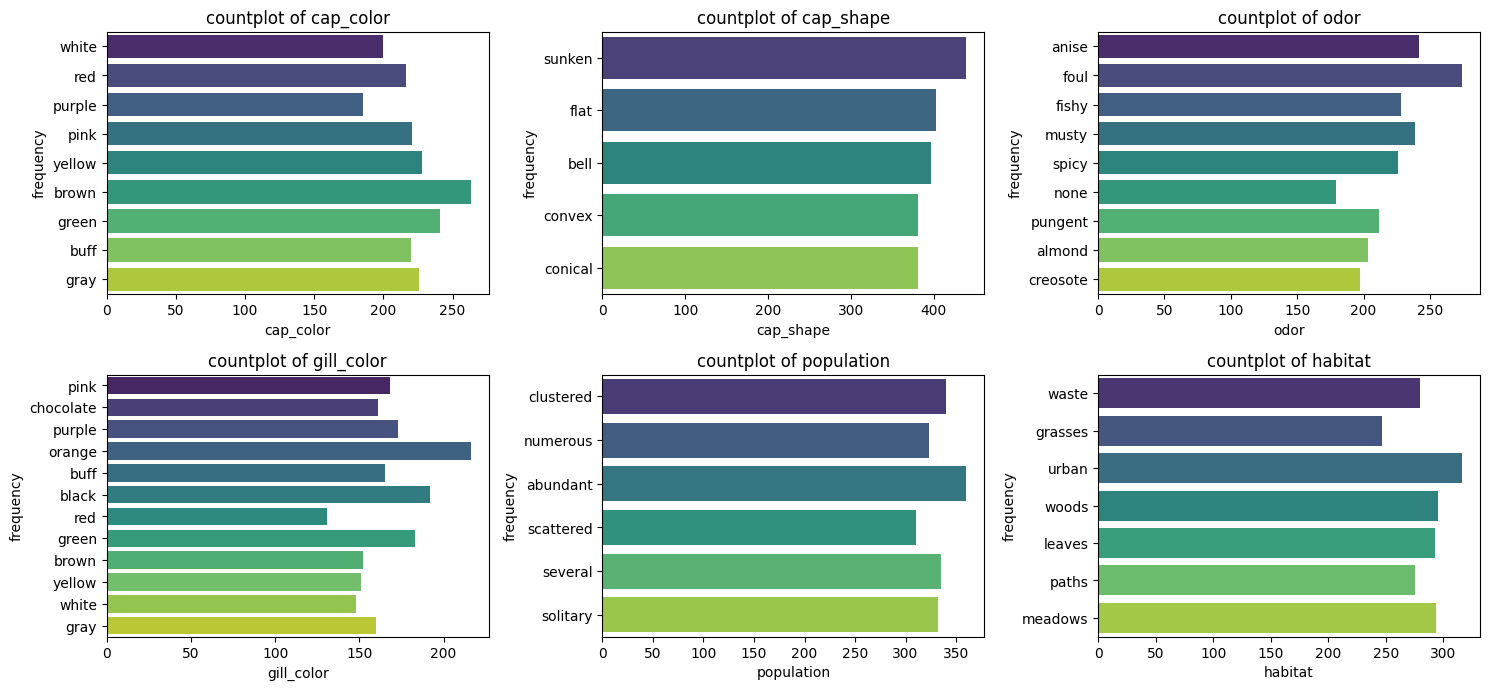

In [7]:
df_cat=['cap_color','cap_shape','odor','gill_color','population','habitat']
plt.figure(figsize=(15,10))
for i,col in enumerate(df_cat):
  plt.subplot(3,3,i+1)
  sns.countplot(df[col],palette='viridis')
  plt.title(f'countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [8]:
num_df=df.select_dtypes(include='number').columns.tolist()
cat_df=df.select_dtypes(include='object').columns.tolist()

In [9]:
if 'Unnamed: 0' in num_df:
  num_df.remove('Unnamed: 0')
if'Unnamed: 0' in cat_df:
  cat_df.remove('Unnamed: 0')

if'class' in cat_df:
  cat_df.remove('class')
print(num_df)
print(cat_df)


['stalk_height', 'cap_diameter']
['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


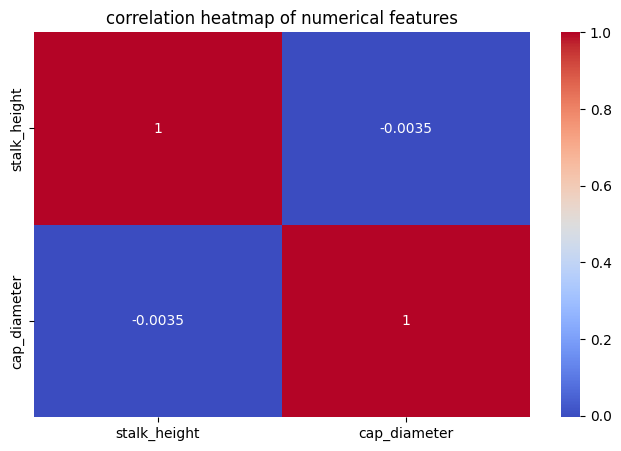

In [10]:
num_cr=df[num_df].corr()

plt.figure(figsize=(8,5))
sns.heatmap(num_cr,annot=True,cmap='coolwarm')
plt.title('correlation heatmap of numerical features')
plt.show()


**Task 2: Data Preprocessing**

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.


In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

if 'class' in df.columns:

   df['class_encode']=le.fit_transform(df['class'])

print("original class :",df['class'].unique())
print("encoded class :",df['class_encode'].unique())


original class : ['poisonous' 'edible']
encoded class : [1 0]


In [12]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter,class_encode
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983,1
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319,0
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884,1
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692,1
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245,1


In [13]:
categorical_features_to_encode=[col for col in df.select_dtypes(include='object').columns if col not in['class','Unnamed: 0']]

ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_features=ohe.fit_transform(df[categorical_features_to_encode])
encoded_feature_names=ohe.get_feature_names_out(categorical_features_to_encode)
df_encoded=pd.DataFrame(encoded_features,columns=encoded_feature_names,index=df.index)
df_processed=df.drop(columns=categorical_features_to_encode+['class','Unnamed: 0'])
df_processed=pd.concat([df_processed,df_encoded],axis=1)
df_processed.head()

,stalk_height,cap_diameter,class_encode,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_no,bruises_yes,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_descending,gill_attachment_free,gill_attachment_notched,gill_spacing_close,gill_spacing_crowded,gill_spacing_distant,gill_size_broad,...,stalk_color_below_ring_yellow,veil_type_partial,veil_type_universal,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_cobwebby,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,ring_type_sheathing,ring_type_zone,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.952715,19.068319,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.054265,7.205884,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5.226499,20.932692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.037532,12.545245,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 127 entries, stalk_height to habitat_woods
dtypes: float64(126), int64(1)
memory usage: 1.9 MB


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x=df_processed.drop(columns=['class_encode'])
y=df_processed['class_encode']

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)


x_train: (1600, 126)
x_test: (400, 126)
y_train: (1600,)
y_test: (400,)


**Task 3: Data Visualization**

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance


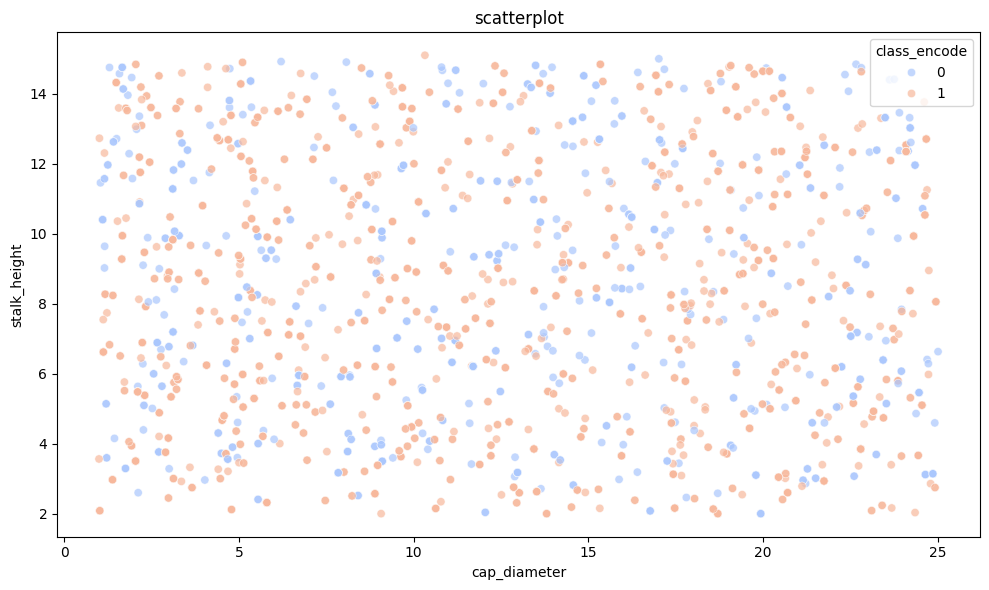

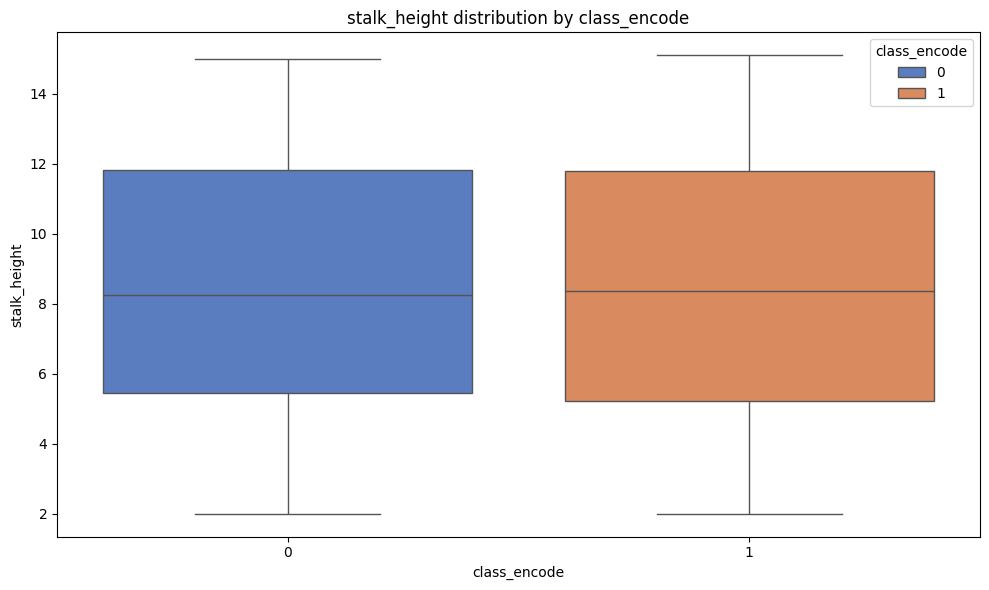

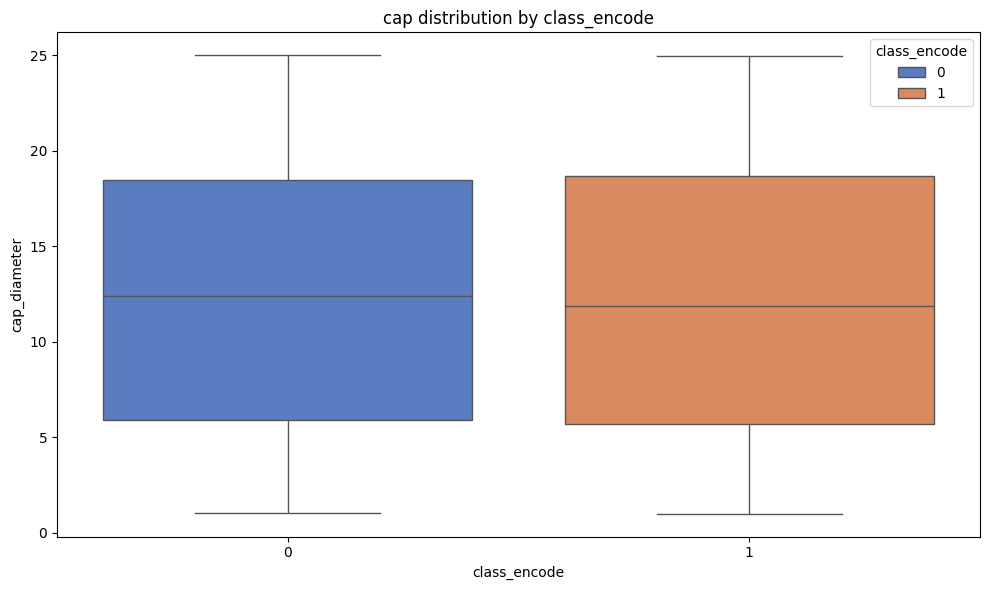

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='cap_diameter',y='stalk_height',hue='class_encode',data=df_processed,palette='coolwarm',alpha=0.7)
plt.title('scatterplot')
plt.xlabel('cap_diameter')
plt.ylabel('stalk_height')
plt.tight_layout()
plt.show()



plt.figure(figsize=(10,6))
sns.boxplot(x='class_encode',y='stalk_height',data=df_processed,hue='class_encode',palette='muted',legend=True)
plt.title('stalk_height distribution by class_encode')
plt.xlabel('class_encode')
plt.ylabel('stalk_height')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='class_encode',y='cap_diameter',data=df_processed,hue='class_encode',palette='muted',legend=True)
plt.title('cap distribution by class_encode')
plt.xlabel('class_encode')
plt.ylabel('cap_diameter')
plt.tight_layout()

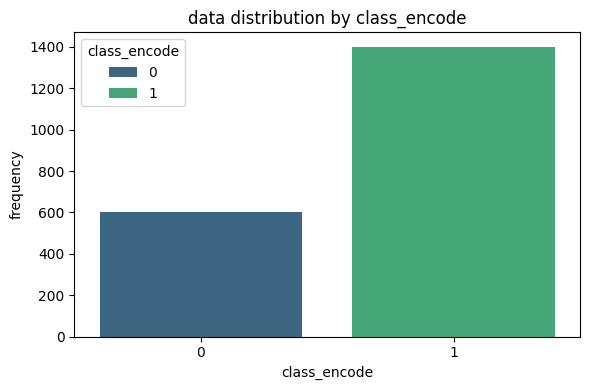

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='class_encode',data=df_processed,palette='viridis',hue='class_encode')
plt.title('data distribution by class_encode')
plt.xlabel('class_encode')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

**Task 4: SVM Implementation**

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [21]:
from sklearn.svm import SVC

In [22]:
svm_model=SVC(random_state=42)
svm_model.fit(x_train,y_train)


SVC(random_state=42)

In [23]:
y_pred=svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**accuracy 0.67 is so poor **

i will apply standardscaler too see if there any imporvement in accuracy

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [27]:
x_scaled=x.copy()
x_scaled[num_df]=ss.fit_transform(x_scaled[num_df])
x_scaled.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_no,bruises_yes,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_descending,gill_attachment_free,gill_attachment_notched,gill_spacing_close,gill_spacing_crowded,gill_spacing_distant,gill_size_broad,gill_size_narrow,...,stalk_color_below_ring_yellow,veil_type_partial,veil_type_universal,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_cobwebby,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,ring_type_sheathing,ring_type_zone,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.576459,-1.030123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.216463,0.958407,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.163717,-0.724904,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.871852,1.222967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.511897,0.032765,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
x_train_scaled,x_test_scaled,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [30]:
svm_model_scaled=SVC(random_state=42)
svm_model_scaled.fit(x_train_scaled,y_train)
y_pred_scaled=svm_model_scaled.predict(x_test_scaled)
y


,class_encode
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [36]:

print('classification report:',classification_report(y_test,y_pred_scaled))
print('confusion matrix:',confusion_matrix(y_test,y_pred_scaled))

classification report:               precision    recall  f1-score   support

           0       0.97      0.50      0.66       133
           1       0.80      0.99      0.88       267

    accuracy                           0.83       400
   macro avg       0.88      0.74      0.77       400
weighted avg       0.86      0.83      0.81       400

confusion matrix: [[ 66  67]
 [  2 265]]


**Task 5: Visualization of SVM Results**

1.	Visualize classification results on the testing data.


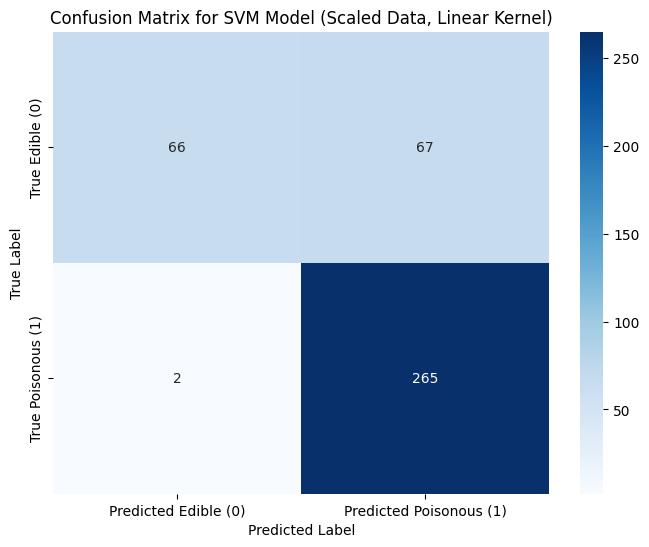

In [37]:
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Edible (0)', 'Predicted Poisonous (1)'],
            yticklabels=['True Edible (0)', 'True Poisonous (1)'])
plt.title('Confusion Matrix for SVM Model (Scaled Data, Linear Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
svm_model_rbf=SVC(kernel='rbf',random_state=42)
svm_model_rbf.fit(x_train_scaled,y_train)
y_pred_rbf=svm_model_rbf.predict(x_test_scaled)

In [39]:
accuracy_score(y_test,y_pred_rbf)

0.8275

In [41]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.97      0.50      0.66       133
           1       0.80      0.99      0.88       267

    accuracy                           0.83       400
   macro avg       0.88      0.74      0.77       400
weighted avg       0.86      0.83      0.81       400



In [43]:
svm_model_poly=SVC(kernel='poly',random_state=42)
svm_model_poly.fit(x_train_scaled,y_train)
y_pred_poly=svm_model_poly.predict(x_test_scaled)
accuracy_score(y_test,y_pred_poly)


0.895

In [44]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       133
           1       0.88      0.98      0.93       267

    accuracy                           0.90       400
   macro avg       0.91      0.85      0.87       400
weighted avg       0.90      0.90      0.89       400



**Task 6: Parameter Tuning and Optimization**

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [52]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'kernel':['linear','rbf','poly'],
    'C':[0.1,1,10,100],
    'gamma':['auto','scale',0.1,1]
}
grid_search=GridSearchCV(SVC(random_state=42),param_grid,cv=5,verbose=3,scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train_scaled,y_train)

print('best parameters:',grid_search.best_params_)
print('best score:',grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.8512500000000001


**Task 7: Comparison and Analysis**

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

3.	Discuss practical implications of SVM in real-world classification tasks.



In [59]:
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(x_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best SVM model: {accuracy_best:.4f}")
print("Classification Report for Best SVM Model:")
print(classification_report(y_test, y_pred_best))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix for Best SVM Model:")
print(conf_matrix_best)

Accuracy of the best SVM model: 0.8850
Classification Report for Best SVM Model:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400

Confusion Matrix for Best SVM Model:
[[ 87  46]
 [  0 267]]


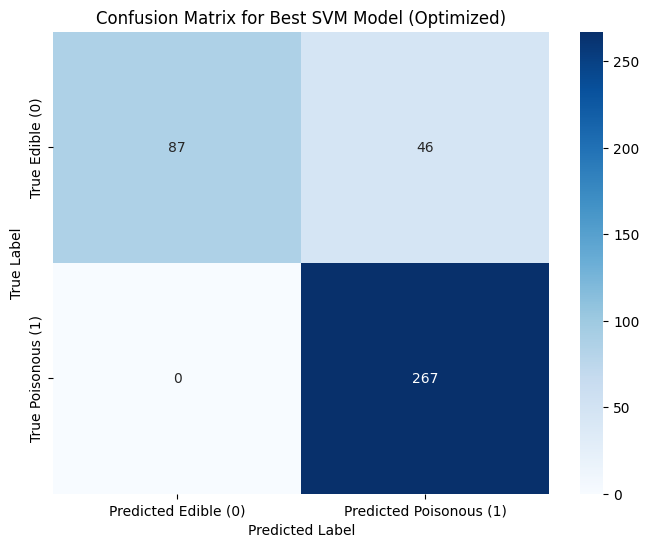

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Edible (0)', 'Predicted Poisonous (1)'],
            yticklabels=['True Edible (0)', 'True Poisonous (1)'])
plt.title('Confusion Matrix for Best SVM Model (Optimized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**strengths**


 1.high recall for poisionous mushrooms

 2.with standardscaling previting the oervfits

**weakness**


1.false positives(low recall) for edible mushrooms   




#  practical implications of SVM in real-world  




*   medical predicting purpose
*   finance and credit score's to offer loans


